In [1]:
from note_reader import get_notes_as_pitch_classes
from wv_utils import create_angle_matrix
from gensim.models import FastText
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob

In [2]:
plt.rcParams["font.family"] = ["Times"]
UNK_TAG = "<UNK>"
file_list = glob.glob("data/txt/*.txt")

In [3]:
docs, counts = get_notes_as_pitch_classes(file_list, makam="nihavent")

In [4]:
counts.most_common()

[('D', 10493),
 ('G', 8833),
 ('A#4', 7567),
 ('A', 7324),
 ('C', 6747),
 ('D#4', 5662),
 ('F', 3273),
 ('F#4', 2651),
 ('C#4', 442),
 ('B', 306),
 ('D#8', 304),
 ('E', 241),
 ('A#8', 132),
 ('D#5', 96),
 ('G#4', 71),
 ('F#5', 67),
 ('C#5', 32),
 ('G#5', 16),
 ('A#5', 11)]

In [5]:
ft_model = FastText(sentences=docs, vector_size=8,
                    epochs=50, window=5, seed=42)
wv = ft_model.wv
wv.most_similar(positive=["C", "D"], negative=["G"])  # D#4

[('B', 0.4692472219467163),
 ('D#4', 0.41908714175224304),
 ('A#4', 0.3885078430175781),
 ('C#5', 0.263640433549881),
 ('C#4', 0.1634484976530075),
 ('F', 0.10148530453443527),
 ('G#4', 0.08709295094013214),
 ('E', 0.054403167217969894),
 ('A#5', -0.04032377898693085),
 ('F#5', -0.12561501562595367)]

In [6]:
angles_dict = create_angle_matrix(wv)
df_nihavent = pd.DataFrame.from_dict(angles_dict)
df_nihavent.to_excel("results/angles_nihavent.xlsx")

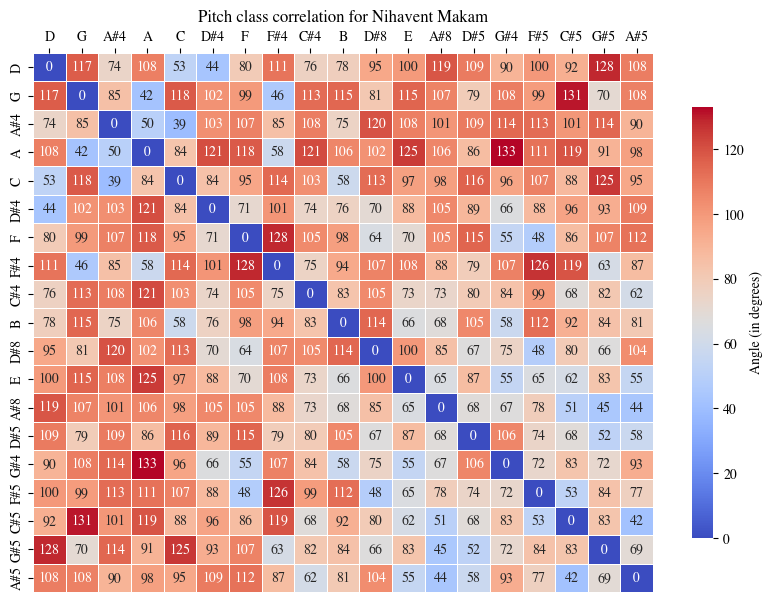

In [24]:
fig, ax = plt.subplots(figsize=(10, 7))
hm = sns.heatmap(df_nihavent, cmap="coolwarm", annot=True,
                 fmt=",.0f", linewidths=0.5, cbar_kws={"shrink": 0.8})
hm.set(title="Pitch class correlation for Nihavent Makam")
ax.collections[0].colorbar.set_label("Angle (in degrees)")
ax.xaxis.tick_top()
plt.show()
fig.savefig("results/nihavent_corr.pdf")